In [48]:
# EXP 1: TRAIN = FAKE, VAL = FAKE, TEST = REAL

In [49]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [50]:
# Train and Val sets (AI)

In [51]:
train_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps\fake", batch_size= 100)
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

Found 1401 files belonging to 2 classes.


In [52]:
data = train_data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.06535693, 0.08496477, 0.05751379],
          [0.06099495, 0.08060279, 0.05315181],
          [0.05611596, 0.0757238 , 0.04827283],
          ...,
          [0.07230392, 0.07230392, 0.08014706],
          [0.05906863, 0.05906863, 0.06691176],
          [0.05490196, 0.05490196, 0.0627451 ]],
 
         [[0.06274893, 0.08235677, 0.05882736],
          [0.05232077, 0.07192861, 0.0483992 ],
          [0.08042663, 0.10003447, 0.07650506],
          ...,
          [0.06817172, 0.06817172, 0.07601486],
          [0.05502451, 0.05502451, 0.06286765],
          [0.05485984, 0.05485984, 0.06270297]],
 
         [[0.08279718, 0.09394914, 0.07887562],
          [0.08182445, 0.09297641, 0.07790288],
          [0.08345588, 0.09460784, 0.07953431],
          ...,
          [0.05803079, 0.05803079, 0.06587393],
          [0.04831878, 0.04831878, 0.05616192],
          [0.05355392, 0.05355392, 0.06139706]],
 
         ...,
 
         [[0.3091452 , 0.18220742, 0.13565028],
          [0.28890

In [53]:
data.as_numpy_iterator().next()[0].min()

0.0

In [54]:
data.as_numpy_iterator().next()[0].max()

1.0

In [55]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [56]:
len(data)

15

In [57]:
val_size

3

In [58]:
train_size

12

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [60]:
# TEST SET (REAL)

In [61]:
test_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps\real", batch_size= 100)
data_iterator = test_data.as_numpy_iterator()
batch1 = data_iterator.next()

Found 1706 files belonging to 2 classes.


In [62]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.33803615, 0.37333027, 0.19685969],
          [0.30988052, 0.34517464, 0.16698836],
          [0.29970893, 0.33500308, 0.1546109 ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.3181832 , 0.3564185 , 0.18362439],
          [0.30620405, 0.34476104, 0.16832107],
          [0.30563724, 0.34460783, 0.16348039]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.31962317, 0.37060356, 0.21374081],
          [0.3101869 , 0.36288297, 0.19401042],
          [0.3214461 , 0.37634805, 0.19203432]],
 
         ...,
 
         [[0.40001532, 0.4274663 , 0.4274663 ],
          [0.39583

In [63]:
test_size = int(len(test_data))

In [64]:
test_size

18

In [65]:
test = test_data.take(test_size)

In [66]:
# THE MODEL

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [68]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# TRAINING

In [70]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 722ms/step - accuracy: 0.5213 - loss: 1.2231 - val_accuracy: 0.5522 - val_loss: 1.0175
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 728ms/step - accuracy: 0.6294 - loss: 1.0191 - val_accuracy: 0.5373 - val_loss: 1.2011
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 661ms/step - accuracy: 0.6950 - loss: 0.8730 - val_accuracy: 0.7910 - val_loss: 0.9479
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 641ms/step - accuracy: 0.8455 - loss: 0.6625 - val_accuracy: 0.8657 - val_loss: 0.8433
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 645ms/step - accuracy: 0.9037 - loss: 0.5201 - val_accuracy: 0.8806 - val_loss: 0.5931
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step - accuracy: 0.9216 - loss: 0.4360 - val_accuracy: 0.9502 - val_loss: 0.3034
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 662ms/step - accuracy: 0.9541 - loss: 0.3561 - val_accuracy: 0.9602 - val_loss: 0.2616
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 687ms/step - accuracy: 0.9490 - loss: 0.3249 - val_accuracy: 

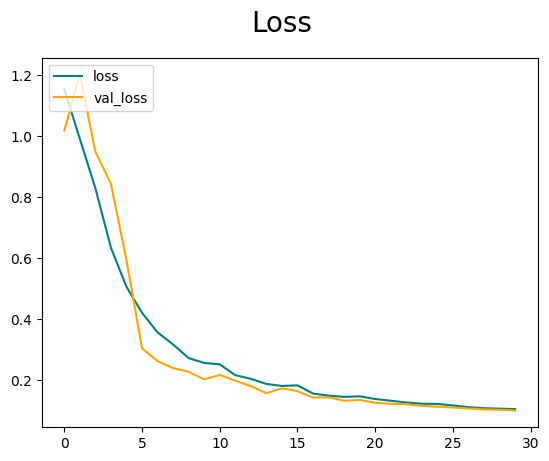

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

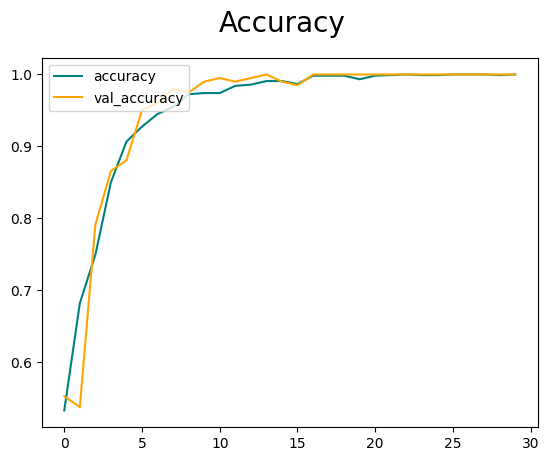

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
# TESTING

In [78]:
test_loss, test_acc = model.evaluate(test, verbose=1)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.3289 - loss: 3.1909
Test Accuracy: 0.35228604078292847
Test Loss: 3.0561139583587646
